In [1]:
import pandas as pd
import ast

In [2]:
df = pd.read_csv('pdfConvertwTopicsGRAD.csv', sep = '|')

In [3]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,0,1,courseNumbers,topics
0,1,1,"IS 567 BC FA22 Text Mining (Blake, C).pdf",syllabus for is567 ac text mining fall 2022...,567,"[(0, 0.43036819), (1, 0.32711214), (2, 0.24251..."
1,2,2,"IS 507 AC, BC FA22 Data, Stat, Info (Besser, S...",course instructor information course and inst...,507,"[(0, 0.6234863), (1, 0.12560283), (2, 0.250910..."
2,3,3,"IS 413 BO SP21 Teen Materials (Quealy, K).pdf",1 is 413ab sp1 teen materials spring 2021 mond...,413,"[(0, 0.2760071), (1, 0.21522711), (2, 0.5087659)]"
3,4,4,IS 584 PVO FA20 Privacy in the Internet Age (B...,privacy in the internet age lis 584 pvo fall 2...,584,"[(0, 0.06494858), (1, 0.07237597), (2, 0.86267..."
4,5,5,IS 458 AO FA19 Instruc Strat Tech Info Prof (W...,is458\tinstructional\tstrategies\tand\ttechniq...,458,"[(0, 0.13391425), (1, 0.5451255), (2, 0.320960..."
5,6,6,"IS 401 ACG, ACU FA22 Introduction to Networked...",1 introduction to networked information...,401,"[(0, 0.20768546), (1, 0.04044642), (2, 0.75186..."
6,8,8,IS 445 AO SP20 Info Books & Resources Youth (M...,is445 ao information books and resources for y...,445,"[(0, 0.38658714), (1, 0.56142485), (2, 0.05198..."
7,10,10,IS 467 AOU SP21 Ethics & Policy for Data Scien...,syllabus for is 467 data ethics and policy 1 ...,467,"[(0, 0.7510866), (1, 0.013267408), (2, 0.23564..."
8,11,11,IS 577 AO SP20 Adv Bibliographic Metadata (Bot...,syllabus advanced bibliographic metadata is57...,577,"[(0, 0.28891408), (1, 0.3104176), (2, 0.400668..."
9,12,12,IS 590 CBO SU20 Cataloging for School Libs (Sh...,is 590 cbo su20 cataloging for school libs sha...,590,"[(0, 0.3855326), (1, 0.14702263), (2, 0.467444..."


In [4]:
list(ast.literal_eval(df['topics'][1]))[0][1]

0.6234863

In [5]:
correctTopic = []
for i in df['topics']:
    tmp = list(ast.literal_eval(i))
    maxVal = 0
    cl = ''
    for j in tmp:
        if j[1] > maxVal:
            cl = j[0]
            maxVal = j[1]
    correctTopic.append(cl)

In [6]:
df['correctTopic'] = correctTopic

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,0,1,courseNumbers,topics,correctTopic
0,1,1,"IS 567 BC FA22 Text Mining (Blake, C).pdf",syllabus for is567 ac text mining fall 2022...,567,"[(0, 0.43036819), (1, 0.32711214), (2, 0.24251...",0
1,2,2,"IS 507 AC, BC FA22 Data, Stat, Info (Besser, S...",course instructor information course and inst...,507,"[(0, 0.6234863), (1, 0.12560283), (2, 0.250910...",0
2,3,3,"IS 413 BO SP21 Teen Materials (Quealy, K).pdf",1 is 413ab sp1 teen materials spring 2021 mond...,413,"[(0, 0.2760071), (1, 0.21522711), (2, 0.5087659)]",2
3,4,4,IS 584 PVO FA20 Privacy in the Internet Age (B...,privacy in the internet age lis 584 pvo fall 2...,584,"[(0, 0.06494858), (1, 0.07237597), (2, 0.86267...",2
4,5,5,IS 458 AO FA19 Instruc Strat Tech Info Prof (W...,is458\tinstructional\tstrategies\tand\ttechniq...,458,"[(0, 0.13391425), (1, 0.5451255), (2, 0.320960...",1


In [8]:
df1 = df[df['correctTopic'] == 0]
df2 = df[df['correctTopic'] == 1]
df3 = df[df['correctTopic'] == 2]

In [9]:
print(len(df1))
print(len(df2))
print(len(df3))

222
189
255


In [14]:
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
#spell correction
#from autocorrect import spell
data = []
for i in range(df3.shape[0]):
    sms = df3.iloc[i, 3]
    # remove non alphabatic characters
    sms = re.sub('[^A-Za-z]', ' ', sms)
    # make words lowercase, because Go and go will be considered as two words
    sms = sms.lower()
    # tokenising
    tokenized_sms = wt(sms)
    # remove stop words and stemming
    sw = stopwords.words('english')
    sw.extend(['cid','student','cours','class','assign','inform','read','week','grade','univers','use','work','learn',
'instructor','due','academi','requir','may','illinoi','complet','pleas','materi','ischool','respons','meet','lectur','final',
'librari','academ','includ','resourc','contact','must'])
    sms_processed = []
    for word in tokenized_sms:
        if word not in set(sw):
            sms_processed.append((stemmer.stem(word)))
    sms_text = " ".join(sms_processed)
    data.append(sms_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fjsti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fjsti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


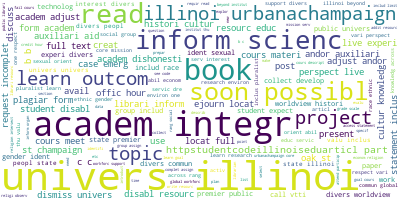

In [15]:
from wordcloud import WordCloud

long_string = ','.join(list(data))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [16]:
courseNumbers = []
firstval = []
for i in df['0']:
    if i[0] == 'I' and i[1] == 'S':
        courseNumbers.append(i[3:6])
    elif i[0] == 'G':
        courseNumbers.append(i[4:7])
    elif i[0] == 'I' and i[1] == 'N':
        courseNumbers.append(i[5:8])
    elif i[0] == 'W':
        courseNumbers.append(i[5:8])
    firstval.append(i[0])

In [19]:
courseNumbers.append('0')

In [20]:
df['courseNumbers'] = courseNumbers

In [33]:
df.head()

,Unnamed: 0.1,Unnamed: 0,0,1,courseNumbers,topics,correctTopic
0,1,1,"IS 567 BC FA22 Text Mining (Blake, C).pdf",syllabus for is567 ac text mining fall 2022...,567,"[(0, 0.43036819), (1, 0.32711214), (2, 0.24251...",0
1,2,2,"IS 507 AC, BC FA22 Data, Stat, Info (Besser, S...",course instructor information course and inst...,507,"[(0, 0.6234863), (1, 0.12560283), (2, 0.250910...",0
2,3,3,"IS 413 BO SP21 Teen Materials (Quealy, K).pdf",1 is 413ab sp1 teen materials spring 2021 mond...,413,"[(0, 0.2760071), (1, 0.21522711), (2, 0.5087659)]",2
3,4,4,IS 584 PVO FA20 Privacy in the Internet Age (B...,privacy in the internet age lis 584 pvo fall 2...,584,"[(0, 0.06494858), (1, 0.07237597), (2, 0.86267...",2
4,5,5,IS 458 AO FA19 Instruc Strat Tech Info Prof (W...,is458\tinstructional\tstrategies\tand\ttechniq...,458,"[(0, 0.13391425), (1, 0.5451255), (2, 0.320960...",1


In [21]:
df1 = df[df['correctTopic'] == 0]
df2 = df[df['correctTopic'] == 1]
df3 = df[df['correctTopic'] == 2]

In [22]:
import matplotlib.pyplot as plt
import math

In [98]:
#def roundDown(x):
#    return int(math.floor(x / 100.0)) * 100

In [34]:
courses1 = df1['courseNumbers'].to_numpy()
courses2 = df2['courseNumbers'].to_numpy()
courses3 = df3['courseNumbers'].to_numpy()

In [54]:
for i in range(len(courses1)):
    if int(courses1[i]) > 400:
        courses1[i] = int(courses1[i])
    else:
        courses1[i] = 400

In [57]:
courses1

array([567, 507, 467, 571, 419, 545, 501, 471, 510, 423, 467, 581, 567,
       419, 591, 544, 529, 507, 461, 502, 597, 420, 517, 407, 510, 563,
       590, 424, 504, 542, 467, 590, 537, 587, 590, 429, 544, 571, 413,
       518, 590, 590, 571, 510, 515, 594, 581, 409, 581, 582, 477, 407,
       490, 505, 501, 591, 563, 532, 410, 530, 571, 529, 503, 400, 583,
       590, 502, 578, 560, 400, 532, 400, 455, 517, 515, 571, 567, 400,
       418, 581, 582, 430, 506, 439, 400, 462, 551, 588, 591, 501, 559,
       504, 503, 471, 419, 544, 571, 578, 590, 571, 501, 592, 560, 585,
       519, 595, 551, 430, 596, 510, 446, 400, 490, 507, 590, 507, 400,
       582, 400, 501, 503, 453, 400, 573, 545, 534, 585, 542, 400, 516,
       400, 597, 573, 579, 586, 453, 537, 581, 582, 501, 571, 555, 508,
       400, 400, 501, 542, 585, 573, 543, 530, 400, 530, 467, 510, 505,
       594, 519, 400, 583, 400, 527, 523, 504, 501, 543, 540, 400, 539,
       584, 591, 430, 501, 457, 582, 530, 581, 510, 418, 451, 58

In [40]:
import numpy as np

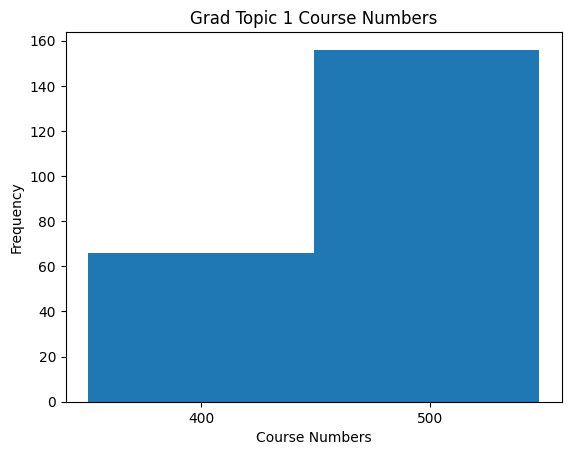

In [58]:

plt.hist(courses1, bins = 2, align = 'left')
plt.xticks([400,500])
plt.title('Grad Topic 1 Course Numbers')
plt.ylabel('Frequency')
plt.xlabel('Course Numbers')
plt.show()